In [1]:
#Importando as libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('datahackers-survey-2019-anonymous-responses.csv')

In [2]:
#Vendo as 5 primeiras entradas
df.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')",...,"('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,...,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,...,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,...,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,...,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,...,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


In [3]:
#Verificando as dimensões
print('Linhas: ', df.shape[0])
print('Colunas: ', df.shape[1])

Linhas:  1765
Colunas:  170


In [4]:
#Vendo o nome das colunas
df.columns

Index(['('P0', 'id')', '('P1', 'age')', '('P2', 'gender')',
       '('P3', 'living_in_brasil')', '('P5', 'living_state')',
       '('P6', 'born_or_graduated')', '('P8', 'degreee_level')',
       '('P10', 'job_situation')', '('P12', 'workers_number')',
       '('P13', 'manager')',
       ...
       '('P34', 'other')', '('P35', 'data_science_plataforms_preference')',
       '('P35', 'other')', '('P36', 'draw_participation')',
       '('D1', 'living_macroregion')', '('D2', 'origin_macroregion')',
       '('D3', 'anonymized_degree_area')',
       '('D4', 'anonymized_market_sector')',
       '('D5', 'anonymized_manager_level')', '('D6', 'anonymized_role')'],
      dtype='object', length=170)

In [5]:
#Alterando o nome das colunas que serão utilizadas
df.rename(columns={"('P1', 'age')": "age", "('P2', 'gender')": "gender", "('P8', 'degreee_level')": "degree_level",
                   "('P16', 'salary_range')": "salary", "('P17', 'time_experience_data_science')": "time_experience_ds",
                   "('P18', 'time_experience_before')": "time_experience_before", 
                   "('P19', 'is_data_science_professional')": "ds_professional",
                   "('P22', 'most_used_proggraming_languages')": "language", "('P5', 'living_state')": "state",
                   "('P10', 'job_situation')": "job_situation", "('P12', 'workers_number')": "workers_number",
                   "('P13', 'manager')": "manager","('D3', 'anonymized_degree_area')": "degree_area", 
                   "('D4', 'anonymized_market_sector')": "market_sector", "('D6', 'anonymized_role')": "profissao"},
          inplace=True)

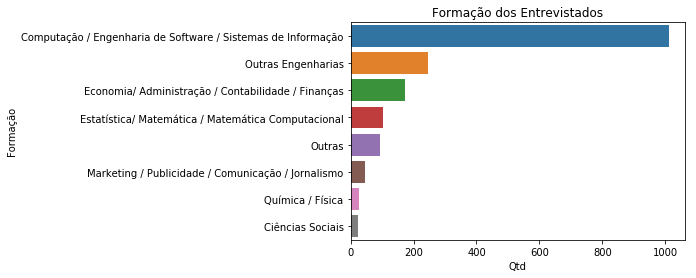

Áreas de Formação:  ['Computação / Engenharia de Software / Sistemas de Informação'
 'Outras Engenharias' 'Economia/ Administração / Contabilidade / Finanças'
 'Estatística/ Matemática / Matemática Computacional' 'Química / Física'
 'Outras' 'Marketing / Publicidade / Comunicação / Jornalismo' nan
 'Ciências Sociais']


In [6]:
#Verificando por áreas de formação
formacao = "degree_area"
sns.barplot(x=df[formacao].value_counts(),y=df[formacao].value_counts().index)
plt.title('Formação dos Entrevistados')
plt.ylabel('Formação')
plt.xlabel('Qtd')
plt.show()

print ('Áreas de Formação: ', df[formacao].unique())

É visto que a maioria dos entrevistados fazem cursos ligado a Tecnologia.

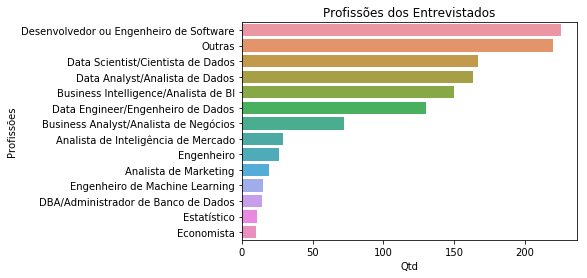

Áreas de atuação:  ['Outras' 'Data Analyst/Analista de Dados'
 'Business Intelligence/Analista de BI' nan
 'Desenvolvedor ou Engenheiro de Software'
 'Data Scientist/Cientista de Dados' 'Analista de Inteligência de Mercado'
 'Engenheiro' 'Business Analyst/Analista de Negócios'
 'Data Engineer/Engenheiro de Dados' 'DBA/Administrador de Banco de Dados'
 'Analista de Marketing' 'Estatístico' 'Engenheiro de Machine Learning'
 'Economista']


In [7]:
#Verificando por áreas de atuação
atuacao = "profissao"
sns.barplot(x=df[atuacao].value_counts(), y=df[atuacao].value_counts().index)
plt.title('Profissões dos Entrevistados')
plt.ylabel('Profissões')
plt.xlabel('Qtd')
plt.show()

print('Áreas de atuação: ', df[atuacao].unique())

É visto que a maioria dos entrevistados são Desenvolvedores ou Engenheiro de Softwares

In [8]:
#Com o intuito de focar em profissionais de Ciência de dados, eliminarei algumas informações
atuacao = "profissao"

df1 = df[~(df[atuacao].isin(['Desenvolvedor ou Engenheiro de Software', 'Engenheiro', 'Outras', 'NaN']))].copy()
df1.reset_index(drop=True, inplace=True)

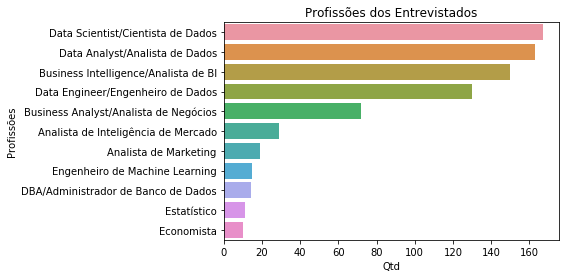

Áreas de atuação:  ['Data Analyst/Analista de Dados' 'Business Intelligence/Analista de BI'
 nan 'Data Scientist/Cientista de Dados'
 'Analista de Inteligência de Mercado'
 'Business Analyst/Analista de Negócios'
 'Data Engineer/Engenheiro de Dados' 'DBA/Administrador de Banco de Dados'
 'Analista de Marketing' 'Estatístico' 'Engenheiro de Machine Learning'
 'Economista']


In [9]:
#Verificando por áreas de atuação após formatação
atuacao = "profissao"
sns.barplot(x=df1[atuacao].value_counts(), y=df1[atuacao].value_counts().index)
plt.title('Profissões dos Entrevistados')
plt.ylabel('Profissões')
plt.xlabel('Qtd')
plt.show()

print('Áreas de atuação: ', df1[atuacao].unique())

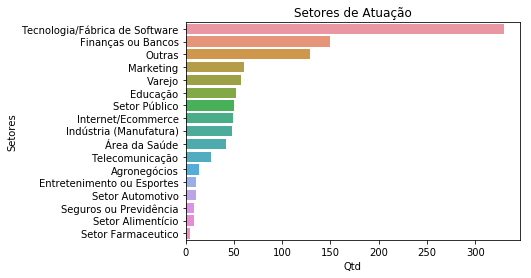

Setores de atuação:  ['Educação' 'Tecnologia/Fábrica de Software' 'Internet/Ecommerce' 'Outras'
 'Área da Saúde' 'Indústria (Manufatura)' nan 'Varejo' 'Telecomunicação'
 'Seguros ou Previdência' 'Finanças ou Bancos' 'Setor Público' 'Marketing'
 'Setor Farmaceutico' 'Entretenimento ou Esportes' 'Setor Automotivo'
 'Setor Alimentício' 'Agronegócios']


In [10]:
#Verificando os melhores setores de atuação
setorAtuacao = 'market_sector'
sns.barplot(x=df1[setorAtuacao].value_counts(), y=df1[setorAtuacao].value_counts().index)
plt.title('Setores de Atuação')
plt.ylabel('Setores')
plt.xlabel('Qtd')
plt.show()

print('Setores de atuação: ', df1[setorAtuacao].unique())

Os setores que mais acumulam profissionais na área de Ciência de Dados são de Tecnologia e Fábrica de Softwares

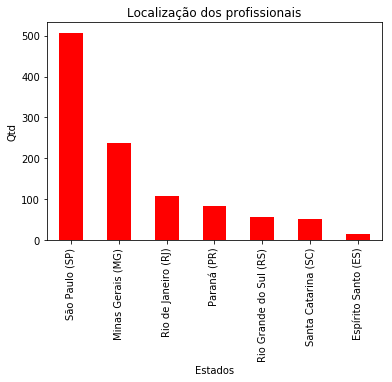

In [11]:
#Localização dos profissionais
df1.state.value_counts().plot.bar(color='red')
plt.title('Localização dos profissionais')
plt.ylabel('Qtd')
plt.xlabel('Estados')
plt.show()

São Paulo é o estado que mais aculuma Cientista de Dados, seguido de MG e RJ respectivamente

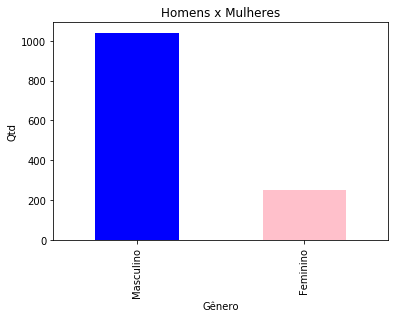

In [12]:
#Situação por gênero
df1.gender.value_counts().plot.bar(color=['blue', 'pink'])
plt.title('Homens x Mulheres')
plt.xlabel('Gênero')
plt.ylabel('Qtd')
plt.show()

Homens são mais comuns ná área de Data Science

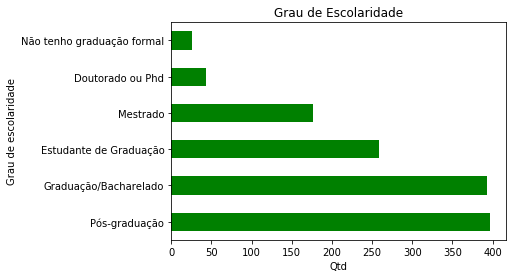

In [25]:
#Situação Por grau de escolaridade
df1.degree_level.value_counts().plot.barh(color=['green'])
plt.title('Grau de Escolaridade')
plt.xlabel('Qtd')
plt.ylabel('Grau de escolaridade')
plt.show()

O maioria pública fica com quem tem uma Graduação e uma Pós-graduação completas, quase empatadas.

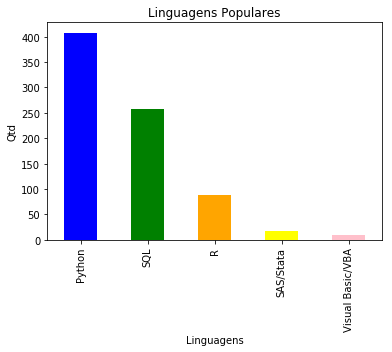

In [14]:
#Linguagem mais popular entre os profissionais
df1.language.value_counts().nlargest(5).plot.bar(color=['blue', 'green', 'orange', 'yellow', 'pink'])
plt.title('Linguagens Populares')
plt.xlabel('Linguagens')
plt.ylabel('Qtd')
plt.show()

Python como esperado é a linguagem mais popular

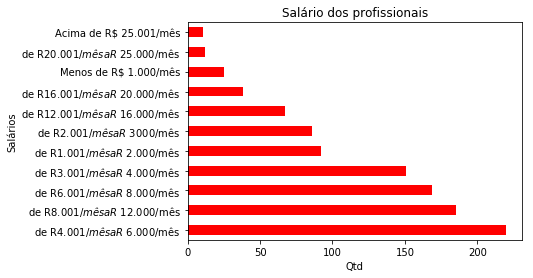

In [15]:
#Média salarial dos profissionais
df1.salary.value_counts().plot.barh(color=['red'])
plt.title('Salário dos profissionais')
plt.xlabel('Qtd')
plt.ylabel('Salários')
plt.show()

As profissões são promissoras, pagando bons salários, onde a maioria recebe entre 4 e 6 mil reais mensalmente.

In [16]:
# Criando a média salarial (solução por Lucas Trajano - https://www.kaggle.com/lucastrajano)
col_search = "salary"
df1['meanSal'] = df1[col_search].fillna('$ 0/').apply(lambda x: # obter a média em intervalos
                    int( #transforma tudo em inteiro
                    (int(str(x)[str(x).rfind(' ')+1:str(x).rfind('/')].replace('.','')) #obtem o maior valor 
                    +
                    int(str(x)[str(x).find('$')+2:str(x).find('/')].replace('.','')) #obtem o menor valor
                    )/2)) #divide por dois

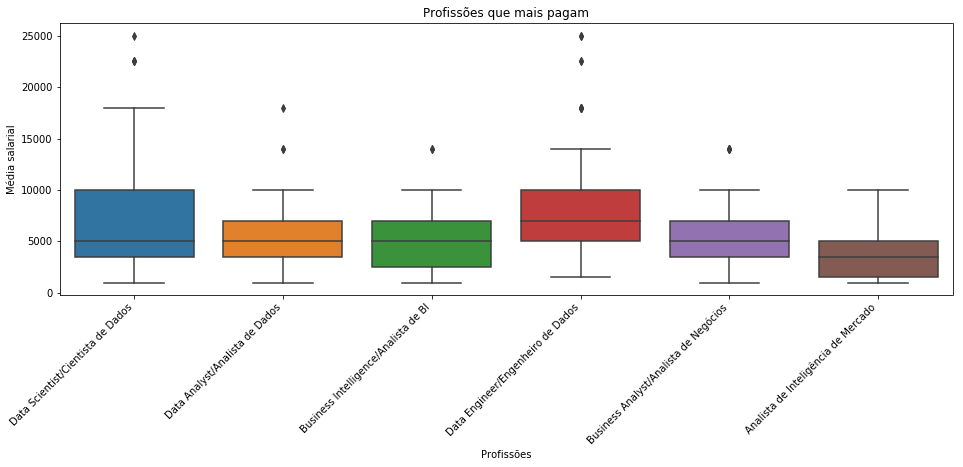

In [17]:
#Distribuição de acordo com a profissão que trabalha.
mediaSalProfissao = "profissao"

mask = df1[mediaSalProfissao].fillna('NA').value_counts() > 25
mask2 = df1[mediaSalProfissao].fillna('NA').apply(lambda x: mask[str(x)])

plt.figure(figsize=(16,5))

ax = sns.boxplot(y=df1['meanSal'].fillna('NA')[mask2], 
               x=df1[mediaSalProfissao][mask2], 
               order=df1[mediaSalProfissao][mask2].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Profissões que mais pagam')
plt.xlabel('Profissões')
plt.ylabel('Média salarial')
plt.show()

Aparentemente, o dinheiro está com os Cientista de Dados e os Engenheiros de Dados

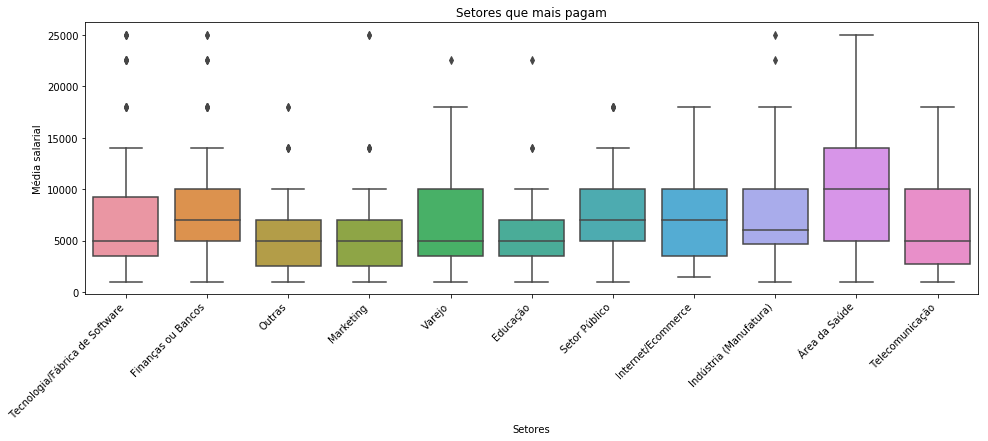

In [18]:
#Distribuição de acordo com o setor que trabalha.
mediaSalSetor = "market_sector"

mask = df1[mediaSalSetor].fillna('NA').value_counts() > 25
mask2 = df1[mediaSalSetor].fillna('NA').apply(lambda x: mask[str(x)])

plt.figure(figsize=(16,5))

ax = sns.boxplot(y=df1['meanSal'].fillna('NA')[mask2], 
               x=df1[mediaSalSetor][mask2], 
               order=df1[mediaSalSetor][mask2].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Setores que mais pagam')
plt.xlabel('Setores')
plt.ylabel('Média salarial')
plt.show()

Aparentemente, a maior concentração do dinheiro está com os setores da Saúde, seguido de E-commerce e Finanças.

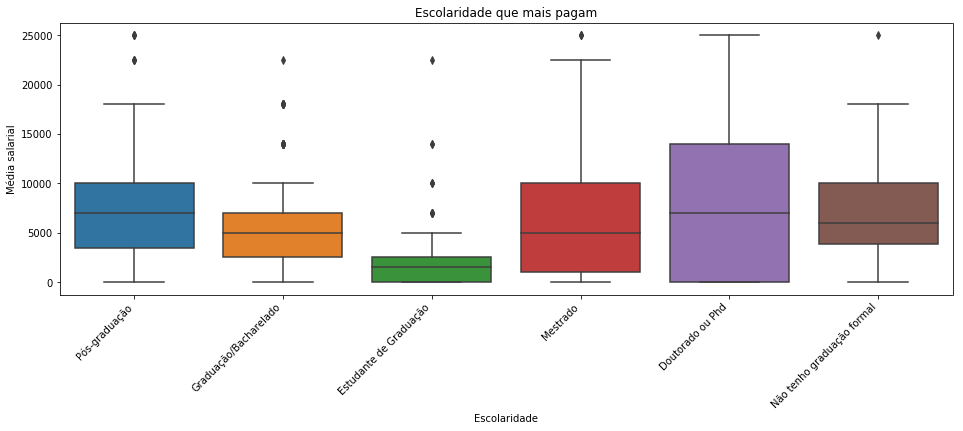

In [19]:
#Distribuição de acordo com o setor que trabalha.
mediaSalEscolaridade = "degree_level"

mask = df1[mediaSalEscolaridade].fillna('NA').value_counts() > 25
mask2 = df1[mediaSalEscolaridade].fillna('NA').apply(lambda x: mask[str(x)])

plt.figure(figsize=(16,5))

ax = sns.boxplot(y=df1['meanSal'].fillna('NA')[mask2], 
               x=df1[mediaSalEscolaridade][mask2], 
               order=df1[mediaSalEscolaridade][mask2].value_counts().index)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Escolaridade que mais pagam')
plt.xlabel('Escolaridade')
plt.ylabel('Média salarial')
plt.show()

Doutores são os que mais recebem por isso, seguido de Mestres, Especialistas e Graduados.

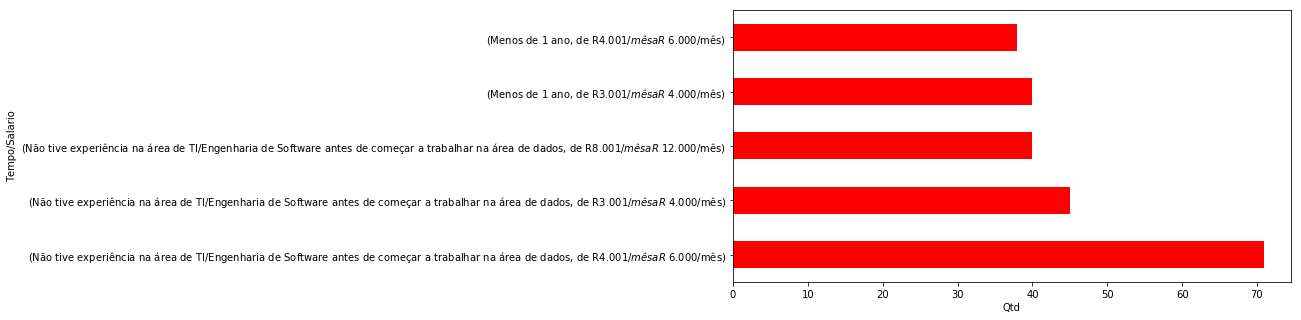

In [20]:
#Relação salarial do Salário com o Tempo de Experiencia
df1.groupby(['time_experience_before'])['salary'].value_counts().nlargest(5).sort_values(ascending=False).plot(kind='barh', figsize=(10,5), color= "red")
plt.ylabel('Tempo/Salario')
plt.xlabel('Qtd')
plt.show()

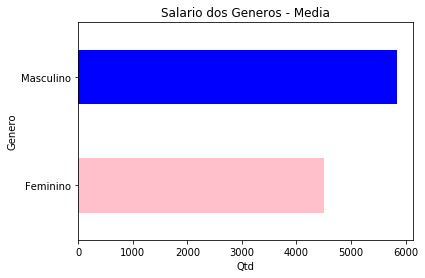

In [21]:
#Relação salariais dos profissionais a partir Genero
df1.groupby(['gender'])['meanSal'].mean().plot.barh(color=['pink', 'blue'])
plt.title('Salario dos Generos - Media')
plt.xlabel('Qtd')
plt.ylabel('Genero')
plt.show()

Em média, o público Masculino é mais beneficiado

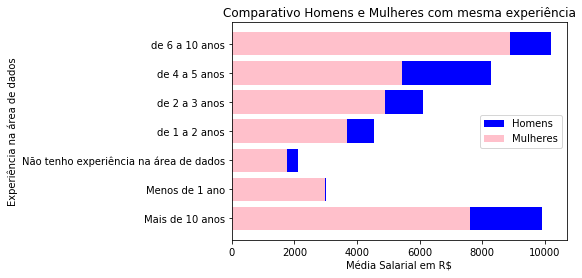

In [22]:
#Média Salarial por Gênero e Experiencia na área de Data Science

homem = df1[df1.loc[:, "gender"] == 'Masculino']
mulher = df1[df1.loc[:, "gender"] == 'Feminino']

xpHomem = homem.groupby("time_experience_ds")['meanSal'].mean()
xpMulher = mulher.groupby("time_experience_ds")['meanSal'].mean()

plt.barh(xpHomem.index, xpHomem.values, color='blue')
plt.barh(xpMulher.index, xpMulher.values, color='pink')

plt.title("Comparativo Homens e Mulheres com mesma experiência")
plt.xlabel("Média Salarial em R$")
plt.ylabel("Experiência na área de dados")
plt.legend(['Homens', 'Mulheres'])

plt.show()

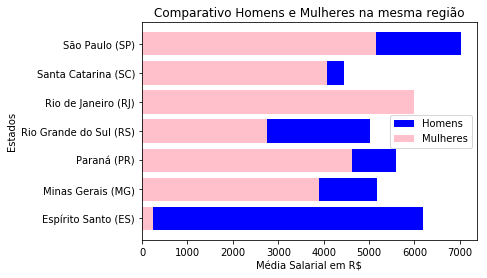

In [23]:
#Média Salarial por Gênero em um mesmo estado
homem = df1[df1.loc[:, "gender"] == 'Masculino'] #Linhas com sexo Masculino
mediaEstadoHomem = homem.groupby("state")['meanSal'].mean() #Média Masculina por região

mulher = df1[df1.loc[:, "gender"] == 'Feminino'] #Linhas com sexo Feminino
mediaEstadoMulher = mulher.groupby('state')['meanSal'].mean() #Média Masculina por região

plt.barh(mediaEstadoHomem.index, mediaEstadoHomem.values, color='blue')
plt.barh(mediaEstadoMulher.index, mediaEstadoMulher.values, color='pink')

plt.title("Comparativo Homens e Mulheres na mesma região")
plt.xlabel("Média Salarial em R$")
plt.ylabel("Estados")
plt.legend(['Homens', 'Mulheres'])

plt.show()

A pesquisa mostra as regiões daqueles que trabalham com dados, a grande maioria habita em São Paulo, Minas Gerais. A maioria dos participantes fizeram Computação, Engenharia de Software ou Sistemas da Informação. Em adição foi encontrado informações sobre salário que podem mostrar a realidade da profissão. E a pesquisa mostra uma desigualdade em relação ao sálario entre homens e mulheres, os sexo masculino ganha em média mais que o sexo feminino, mesmo tendo o tempo de experiência igual.